# Signal Processing with Python

Welcome to Lab 6 of the **Python for Data Science** course! In this lab, we'll explore fundamental signal processing techniques using Python. We'll use synthetic EEG-like data to demonstrate various methods such as filtering and Fourier transforms.

---

## 1. Introduction to Signal Processing

Signal processing is a field that focuses on analyzing and manipulating signals. In neuroscience, signal processing is crucial for analyzing EEG and other neural data to extract meaningful information.

---

## 2. Generating Synthetic EEG-like Data

Before diving into signal processing techniques, let's create some synthetic EEG-like data that we can use for demonstrations.

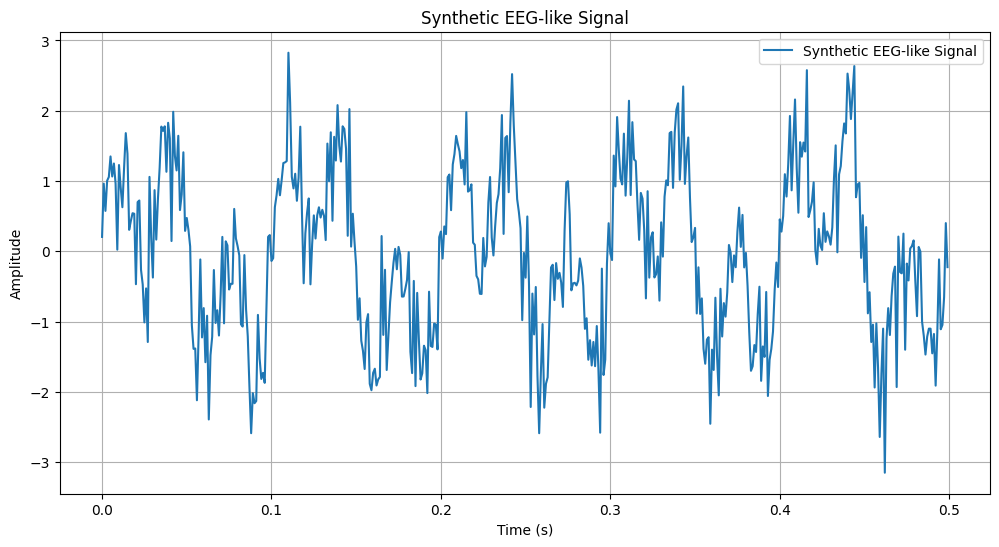

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for synthetic data
n_samples = 1000
n_time_points = 500
sampling_rate = 1000  # Hz

# Generate synthetic EEG-like data
time = np.arange(n_time_points) / sampling_rate
signal = np.sin(2 * np.pi * 10 * time) + np.sin(2 * np.pi * 30 * time)  # Two frequency components
noise = 0.5 * np.random.randn(n_time_points)
eeg_data = signal + noise

plt.figure(figsize=(12, 6))
plt.plot(time, eeg_data, label='Synthetic EEG-like Signal')
plt.title('Synthetic EEG-like Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

---

## 3. Filtering the Signal

Filtering is used to remove unwanted components from a signal. We'll apply a low-pass filter to our synthetic EEG-like data to remove high-frequency noise.

### 3.1. Implementing a Low-pass Filter

We'll use a Butterworth filter for this purpose.



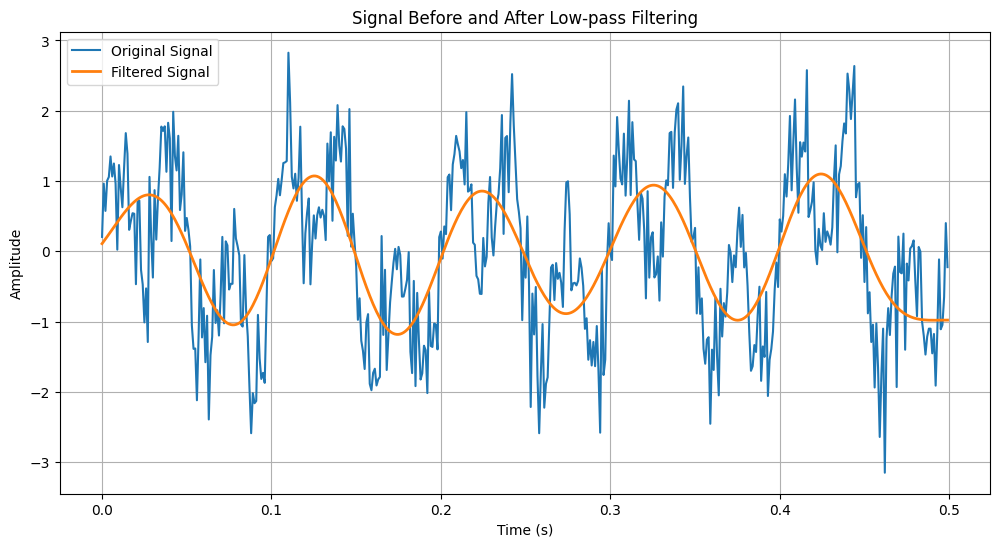

In [2]:
from scipy.signal import butter, filtfilt

# Define the Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply the low-pass filter to the synthetic EEG-like data
cutoff_frequency = 15  # Hz
filtered_data = butter_lowpass_filter(eeg_data, cutoff_frequency, sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(time, eeg_data, label='Original Signal')
plt.plot(time, filtered_data, label='Filtered Signal', linewidth=2)
plt.title('Signal Before and After Low-pass Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### 3.2. Visualizing Filtered Signal

We've applied a low-pass filter to our synthetic EEG-like data. The plot above shows the original and filtered signals.

---

## 4. Fourier Transform

The Fourier Transform is a powerful tool for analyzing the frequency components of a signal. We'll apply the Fast Fourier Transform (FFT) to our synthetic EEG-like data.

### 4.1. Applying FFT

We'll compute and visualize the frequency spectrum of our synthetic signal.



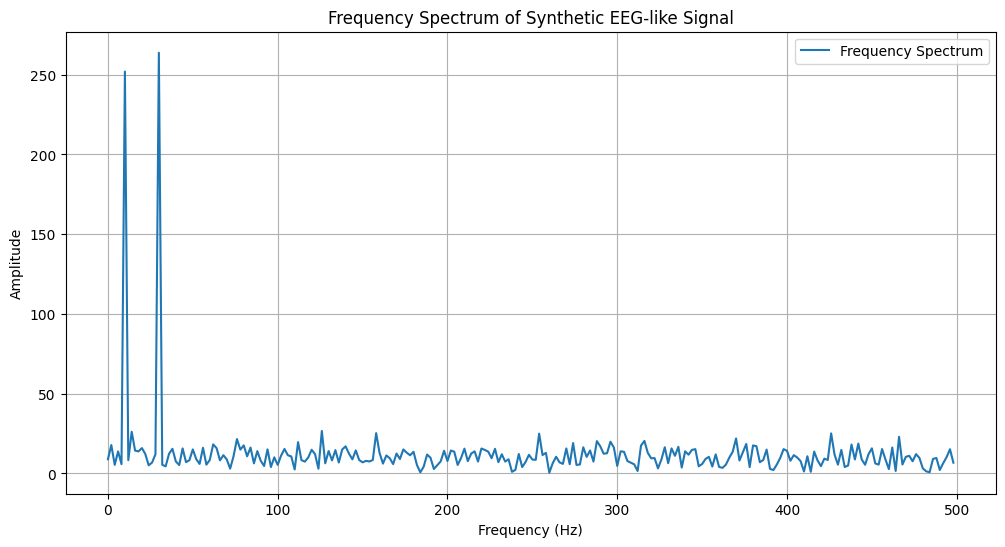

In [3]:
from scipy.fft import fft, fftfreq

# Compute the FFT of the synthetic EEG-like data
N = len(eeg_data)
yf = fft(eeg_data)
xf = fftfreq(N, 1 / sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(xf[:N // 2], np.abs(yf[:N // 2]), label='Frequency Spectrum')
plt.title('Frequency Spectrum of Synthetic EEG-like Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### 4.2. Interpreting the Frequency Spectrum

The plot above shows the frequency components of our synthetic EEG-like signal. Peaks in the spectrum indicate dominant frequencies present in the signal.

---

## 5. Advanced Signal Processing

### 5.1. Example: Applying a Band-pass Filter

Band-pass filters allow signals within a certain frequency range to pass through while attenuating frequencies outside this range. This can be useful for analyzing specific frequency bands in EEG data.



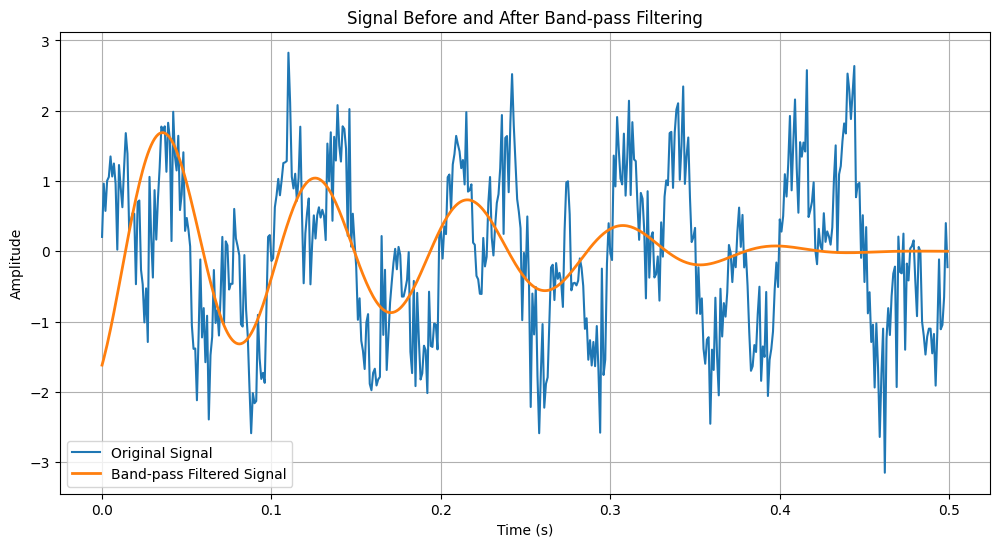

In [4]:
# Define the Butterworth band-pass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Apply a band-pass filter to the synthetic EEG-like data
lowcut = 8  # Lower bound frequency (Hz)
highcut = 12  # Upper bound frequency (Hz)
band_filtered_data = butter_bandpass_filter(eeg_data, lowcut, highcut, sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(time, eeg_data, label='Original Signal')
plt.plot(time, band_filtered_data, label='Band-pass Filtered Signal', linewidth=2)
plt.title('Signal Before and After Band-pass Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### 5.2. Summary and Applications

In this section, we applied various signal processing techniques, including filtering and Fourier transforms, to synthetic EEG-like data. These techniques are fundamental in analyzing and interpreting signals in neuroscience and other fields.

---

## 6. Summary and Next Steps

In this lab, we covered essential signal processing techniques, including filtering, Fourier transforms, and visualizing results. These methods are crucial for analyzing complex signals like EEG data.

### Next Steps:

- Apply these techniques to real EEG or other time-series data.
- Experiment with different types of filters and transformations.
- Explore advanced signal processing methods, such as wavelet transforms.

Keep exploring and applying these techniques to gain deeper insights into your data!

---
